In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
pd.set_option('display.max_columns', None)
burnoutDF=pd.read_csv('/content/drive/MyDrive/employee_burnout_analysis-AI.csv')
burnoutDF

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,9/30/2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,11/30/2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,3/10/2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,11/3/2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,7/24/2008,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,12/30/2008,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,1/19/2008,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,11/5/2008,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,1/10/2008,Female,Service,No,2,5.0,5.9,0.52


In [7]:
burnoutDF["Date of Joining"] = pd.to_datetime(burnoutDF['Date of Joining'])

In [8]:
burnoutDF.shape

(22750, 9)

In [9]:
burnoutDF.info

<bound method DataFrame.info of                     Employee ID Date of Joining  Gender Company Type  \
0      fffe32003000360033003200      2008-09-30  Female      Service   
1          fffe3700360033003500      2008-11-30    Male      Service   
2      fffe31003300320037003900      2008-03-10  Female      Product   
3      fffe32003400380032003900      2008-11-03    Male      Service   
4      fffe31003900340031003600      2008-07-24  Female      Service   
...                         ...             ...     ...          ...   
22745  fffe31003500370039003100      2008-12-30  Female      Service   
22746  fffe33003000350031003800      2008-01-19  Female      Product   
22747          fffe390032003000      2008-11-05    Male      Service   
22748  fffe33003300320036003900      2008-01-10  Female      Service   
22749      fffe3400350031003800      2008-01-06    Male      Product   

      WFH Setup Available  Designation  Resource Allocation  \
0                      No            2                  3.0   
1                     Yes            1                  2.0   
2                     Yes            2                  NaN   
3                     Yes            1                  1.0   
4                      No            3                  7.0   
...                   ...          ...                  ...   
22745                  No            1                  3.0   
22746                 Yes            3                  6.0   
22747                 Yes            3                  7.0   
22748                  No            2                  5.0   
22749                  No            3                  6.0   

       Mental Fatigue Score  Burn Rate  
0                       3.8       0.16  
1                       5.0       0.36  
2                       5.8       0.49  
3                       2.6       0.20  
4                       6.9       0.52  
...                     ...        ...  
22745                   NaN       0.41  
22746                   6.7       0.59  
22747                   NaN       0.72  
22748                   5.9       0.52  
22749                   7.8       0.61  

[22750 rows x 9 columns]>

In [10]:
burnoutDF.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [11]:
burnoutDF.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [12]:
burnoutDF.isna().sum()

,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [13]:
burnoutDF.duplicated().sum()

np.int64(0)

In [14]:
burnoutDF.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [15]:
for i, col in enumerate(burnoutDF.columns):
  print(f"\n\n{burnoutDF[col].unique()}")
  print(f"\n{burnoutDF[col].value_counts()}\n\n")



['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']

Employee ID
fffe3400350031003800        1
fffe32003000360033003200    1
fffe3700360033003500        1
fffe31003300320037003900    1
fffe32003400380032003900    1
                           ..
fffe31003000380035003800    1
fffe31003500350030003400    1
fffe33003200360037003000    1
fffe31003700350033003100    1
fffe33003100330036003300    1
Name: count, Length: 22750, dtype: int64




<DatetimeArray>
['2008-09-30 00:00:00', '2008-11-30 00:00:00', '2008-03-10 00:00:00',
 '2008-11-03 00:00:00', '2008-07-24 00:00:00', '2008-11-26 00:00:00',
 '2008-01-02 00:00:00', '2008-10-31 00:00:00', '2008-12-27 00:00:00',
 '2008-03-09 00:00:00',
 ...
 '2008-05-24 00:00:00', '2008-06-10 00:00:00', '2008-03-31 00:00:00',
 '2008-12-01 00:00:00', '2008-01-05 00:00:00', '2008-09-15 00:00:00',
 '2008-12-10 00:00:00', '2008-02-10 00:00:00', '2008-12-03 00

In [16]:
burnoutDF=burnoutDF.drop(['Employee ID'],axis=1)

In [17]:
intFloatburnoutDF = burnoutDF.select_dtypes([np.int64, np.float64])
for i, col in enumerate(intFloatburnoutDF.columns):
  if (intFloatburnoutDF[col].skew() >= 0.1):
    print("\n",col, "feature is Positively skewed and value is: ", intFloatburnoutDF[col].skew())
  elif (intFloatburnoutDF[col].skew() <= -0.1):
    print("\n",col, "feature is Negtively skewed and value is: ", intFloatburnoutDF[col].skew())
  else:
    print("\n",col, "feature is Normally Distributed and value is: ", intFloatburnoutDF[col].skew())


 Designation feature is Normally Distributed and value is:  0.09242138478903683

 Resource Allocation feature is Positively skewed and value is:  0.20457273454318103

 Mental Fatigue Score feature is Negtively skewed and value is:  -0.4308950578815428

 Burn Rate feature is Normally Distributed and value is:  0.045737370909640515


In [18]:
burnoutDF['Resource Allocation'].fillna(burnoutDF['Resource Allocation'].mean(), inplace=True)
burnoutDF['Mental Fatigue Score'].fillna (burnoutDF['Mental Fatigue Score'].mean(), inplace=True)
burnoutDF['Burn Rate'].fillna(burnoutDF['Burn Rate'].mean(), inplace=True)

In [20]:
burnoutDF.isna().sum()

,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,0
Mental Fatigue Score,0
Burn Rate,0


In [28]:
#burnoutDF = burnoutDF.drop(['WFH Setup Available'], axis=1)
#burnoutDF = burnoutDF.drop(['Company Type'], axis=1)
#burnoutDF = burnoutDF.drop(['Gender'], axis=1)
burnoutDF.corr()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Date of Joining,1.000000,-0.000930,-0.000459,0.002301,-0.001325
Designation,-0.000930,1.000000,0.852046,0.656445,0.719284
Resource Allocation,-0.000459,0.852046,1.000000,0.739268,0.811062
Mental Fatigue Score,0.002301,0.656445,0.739268,1.000000,0.878217
Burn Rate,-0.001325,0.719284,0.811062,0.878217,1.000000


In [30]:
Corr=burnoutDF.corr()
sns.set(rc={'figure.figsize': (14,12)})
fig = px.imshow(Corr, text_auto=True, aspect="auto")
fig.show()

In [32]:
burnoutDF = pd.read_csv('/content/drive/MyDrive/employee_burnout_analysis-AI.csv')

# Strip spaces and unify case
burnoutDF.columns = burnoutDF.columns.str.strip()

# If you want to be extra safe for case mismatches:
burnoutDF.rename(columns=lambda c: c.title(), inplace=True)

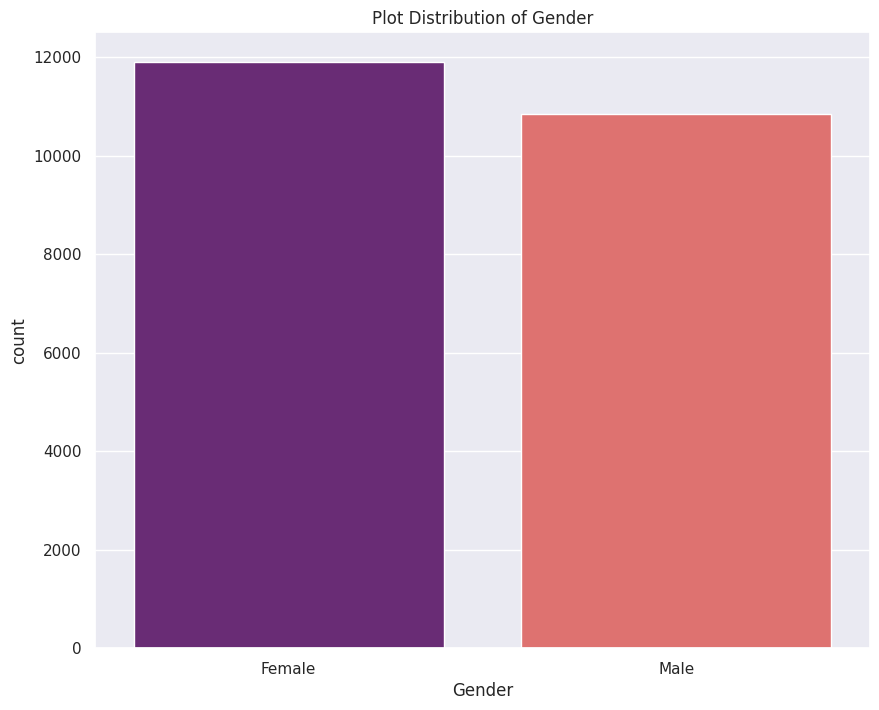

In [33]:
plt.figure(figsize=(10,8))
sns.countplot(x="Gender", data=burnoutDF, palette="magma")
plt.title("Plot Distribution of Gender")
plt.show()

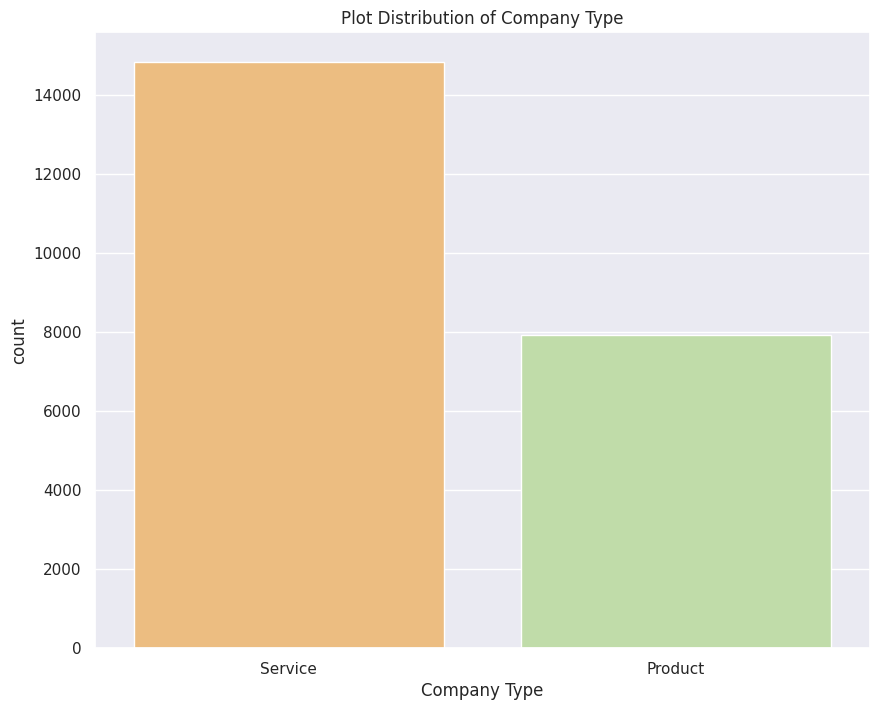

In [34]:
plt.figure(figsize=(10,8))
sns.countplot(x="Company Type", data=burnoutDF, palette="Spectral")
plt.title("Plot Distribution of Company Type")
plt.show()

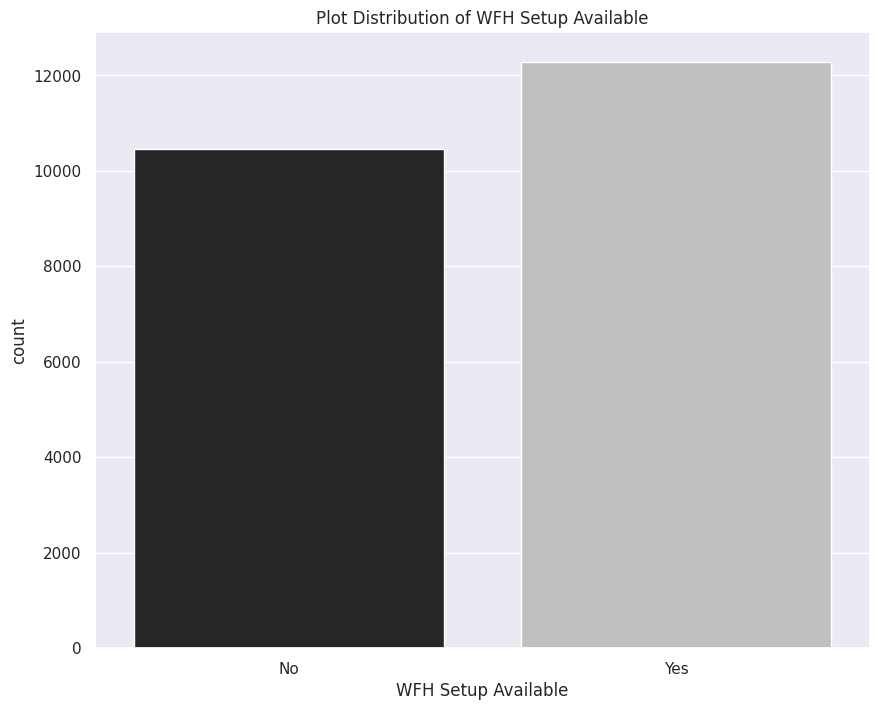

In [36]:
burnoutDF = pd.read_csv('/content/drive/MyDrive/employee_burnout_analysis-AI.csv')

# Clean column names: strip spaces and replace multiple spaces with one
burnoutDF.columns = burnoutDF.columns.str.strip()

plt.figure(figsize=(10,8))
sns.countplot(x="WFH Setup Available", data=burnoutDF, palette="dark:silver")
plt.title("Plot Distribution of WFH Setup Available")
plt.show()


In [37]:
burn_st=burnoutDF.loc[:,'Date of Joining':'Burn Rate']
burn_st-burn_st.select_dtypes ([int, float])
for i, col in enumerate(burn_st.columns):
  fig = px.histogram (burn_st, x=col, title="Plot Distribution of "+col, color_discrete_sequence=['indianred'])
  fig.update_layout (bargap=0.2)
  fig.show()

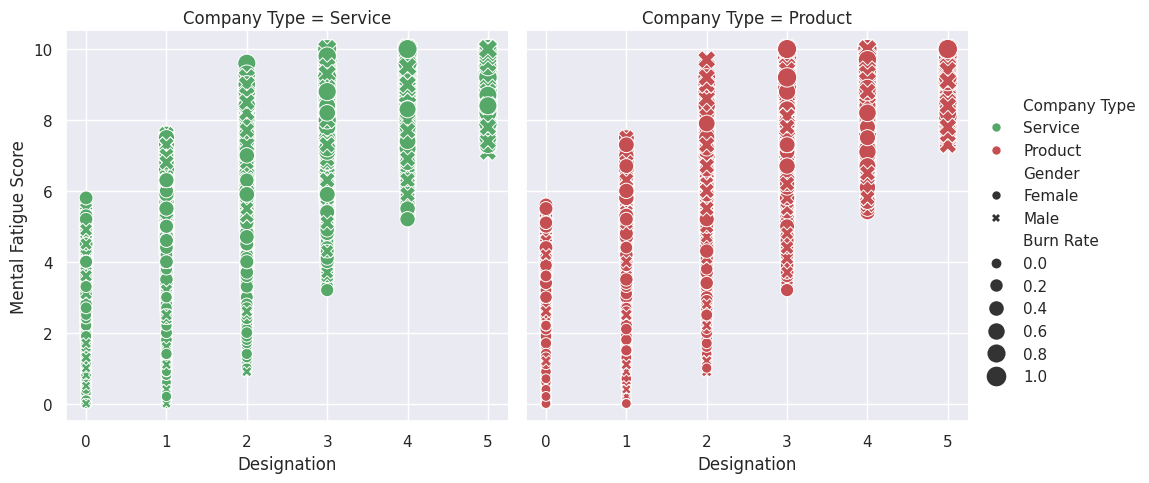

In [38]:
sns.relplot(
    data=burnoutDF, x="Designation", y="Mental Fatigue Score", col="Company Type",
    hue="Company Type", size="Burn Rate", style="Gender",
    palette=["g", "r"], sizes=(50, 200)
)

In [39]:
from sklearn import preprocessing
Label_encode = preprocessing.LabelEncoder()

In [40]:
burnoutDF[ 'GenderLabel'] = Label_encode.fit_transform(burnoutDF[ 'Gender'].values)
burnoutDF[ 'Company TypeLabel'] = Label_encode.fit_transform(burnoutDF['Company Type'].values)
burnoutDF[ 'WFH_Setup_AvailableLabel'] = Label_encode.fit_transform(burnoutDF['WFH Setup Available'].values)

In [41]:
gn = burnoutDF.groupby("Gender")
gn = gn['GenderLabel']
gn.first()

,GenderLabel
Gender,
Female,0
Male,1


In [42]:
ct = burnoutDF.groupby("Company Type")
ct = ct['Company TypeLabel']
ct.first()

,Company TypeLabel
Company Type,
Product,0
Service,1


In [43]:
wsa = burnoutDF.groupby("WFH Setup Available")
wsa = wsa['WFH_Setup_AvailableLabel']
wsa.first()

,WFH_Setup_AvailableLabel
WFH Setup Available,
No,0
Yes,1


In [44]:
burnoutDF.tail(10)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,GenderLabel,Company TypeLabel,WFH_Setup_AvailableLabel
22740,fffe33003300380031003100,9/5/2008,Female,Product,No,3,6.0,7.3,0.55,0,0,0
22741,fffe31003600350034003800,1/7/2008,Male,Product,No,2,5.0,6.0,NaN,1,0,0
22742,fffe33003200310039003000,7/28/2008,Male,Product,No,3,5.0,8.1,0.69,1,0,0
22743,fffe3300390030003600,12/15/2008,Female,Product,Yes,1,3.0,6.0,0.48,0,0,1
22744,fffe32003500370033003200,5/27/2008,Male,Product,No,3,7.0,6.2,0.54,1,0,0
22745,fffe31003500370039003100,12/30/2008,Female,Service,No,1,3.0,NaN,0.41,0,1,0
22746,fffe33003000350031003800,1/19/2008,Female,Product,Yes,3,6.0,6.7,0.59,0,0,1
22747,fffe390032003000,11/5/2008,Male,Service,Yes,3,7.0,NaN,0.72,1,1,1
22748,fffe33003300320036003900,1/10/2008,Female,Service,No,2,5.0,5.9,0.52,0,1,0
22749,fffe3400350031003800,1/6/2008,Male,Product,No,3,6.0,7.8,0.61,1,0,0


In [45]:
Columns=['Designation', 'Resource Allocation', 'Mental Fatigue Score',
         'GenderLabel', 'Company TypeLabel', 'WFH_Setup_AvailableLabel']
X=burnoutDF[Columns]
y=burnoutDF[ 'Burn Rate']

In [46]:
print(X)

       Designation  Resource Allocation  Mental Fatigue Score  GenderLabel  \
0                2                  3.0                   3.8            0   
1                1                  2.0                   5.0            1   
2                2                  NaN                   5.8            0   
3                1                  1.0                   2.6            1   
4                3                  7.0                   6.9            0   
...            ...                  ...                   ...          ...   
22745            1                  3.0                   NaN            0   
22746            3                  6.0                   6.7            0   
22747            3                  7.0                   NaN            1   
22748            2                  5.0                   5.9            0   
22749            3                  6.0                   7.8            1   

       Company TypeLabel  WFH_Setup_AvailableLabel  
0         

In [47]:
print(y)

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 22750, dtype: float64


In [53]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Step 1: Fill missing values
imputer = SimpleImputer(strategy="mean")  # or "median"
X_filled = imputer.fit_transform(X)  # <-- This is now NumPy array without NaNs

# Step 2: PCA on the filled data
pca = PCA(0.95)
X_pca = pca.fit_transform(X_filled)

# Step 3: Show results
print("PCA shape of X is:", X_pca.shape, "and original shape is:", X.shape)
print("% of importance of selected features is:", pca.explained_variance_ratio_)
print("The number of features selected through PCA is:", pca.n_components_)


PCA shape of X is: (22750, 4) and original shape is: (22750, 6)
% of importance of selected features is: [0.78371089 0.11113597 0.03044541 0.02632422]
The number of features selected through PCA is: 4
